<a href="https://colab.research.google.com/github/jieunjeon/Data-Science-Fundamental/blob/master/Exploration/02_rock_scissor_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXPLORATION 2

# Get ready with the rocks, scissors, papers image dataset

In [12]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [75]:
!unzip -qq /content/drive/MyDrive/aiffel/EXP_2_data/papers_complete.zip
!unzip -qq /content/drive/MyDrive/aiffel/EXP_2_data/rocks_complete.zip
!unzip -qq /content/drive/MyDrive/aiffel/EXP_2_data/scissors_complete.zip

replace rocks_complete/rock (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace rocks_complete/rock (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace rocks_complete/rock (100).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
y
y
A


In [31]:
ls

papers_complete/     rocks_complete/     scissors_complete/
papers_complete.zip  rocks_complete.zip  scissors_complete.zip


In [76]:
# set the path for each image folder
img_path = '/content/drive/MyDrive/aiffel/EXP_2_data/';
img_path_rocks = img_path + 'rocks_complete/';
img_path_papers = img_path + 'papers_complete/';
img_path_scissors = img_path + 'scissors_complete/';

In [77]:
# check for the image size
from PIL import Image
image1 = Image.open(img_path_rocks+'rock (1).jpg')
image1.show()
print("size of the original image:", image1.size)

size of the original image: (224, 224)


Change the size of the images to 28 X 28

In [151]:
import os, glob

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# # 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(img_path_rocks)
resize_images(img_path_papers)
resize_images(img_path_scissors)

print("이미지 resize 완료!")

599  images to be resized.
599  images resized.
599  images to be resized.
599  images resized.
599  images to be resized.
599  images resized.
이미지 resize 완료!


Load the data

In [152]:
print(f'{img_path_papers}*.jpg')

/content/drive/MyDrive/aiffel/EXP_2_data/papers_complete/*.jpg


In [153]:
import numpy as np

def load_data(number_of_data=1797):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    imgCount = 0
    for file in glob.iglob(f'{img_path_scissors}*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1
     
      
    for file in glob.iglob(f'{img_path_rocks}*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  

    for file in glob.iglob(f'{img_path_papers}*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

# image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data()
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 1797 입니다.
x_train shape: (1797, 28, 28, 3)
y_train shape: (1797,)


라벨:  0


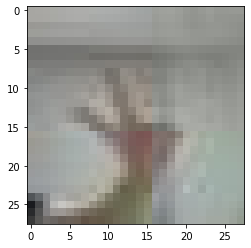

In [154]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

## Architect the Deep Learning Network


In [155]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_11 (Dense)             (

## Train the dataset

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train)
# print(x_train[:1])
# print(y_test[:1])
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1347, 28, 28, 3)
(450, 28, 28, 3)
(1347,)
(450,)


In [127]:
# print("Before Reshape - x_train_norm shape: {}".format(x_train.shape))
# print("Before Reshape - x_test_norm shape: {}".format(x_test.shape))

# x_train_reshaped=x_train.reshape( -1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
# x_test_reshaped=x_test.reshape( -1, 28, 28, 3)

# print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
# print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (1797, 28, 28, 3)
Before Reshape - x_test_norm shape: (450, 28, 28, 3)
After Reshape - x_train_reshaped shape: (1797, 28, 28, 3)
After Reshape - x_test_reshaped shape: (450, 28, 28, 3)


In [157]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
43/43 [==============================] - 1s 19ms/step - loss: 5.6301 - accuracy: 0.4699
Epoch 2/10
43/43 [==============================] - 1s 20ms/step - loss: 1.0468 - accuracy: 0.6808
Epoch 3/10
43/43 [==============================] - 1s 18ms/step - loss: 0.7111 - accuracy: 0.7558
Epoch 4/10
43/43 [==============================] - 1s 18ms/step - loss: 0.6648 - accuracy: 0.7713
Epoch 5/10
43/43 [==============================] - 1s 18ms/step - loss: 0.3952 - accuracy: 0.8330
Epoch 6/10
43/43 [==============================] - 1s 19ms/step - loss: 0.2941 - accuracy: 0.8842
Epoch 7/10
43/43 [==============================] - 1s 19ms/step - loss: 0.2617 - accuracy: 0.9005
Epoch 8/10
43/43 [==============================] - 1s 18ms/step - loss: 0.1954 - accuracy: 0.9228
Epoch 9/10
43/43 [==============================] - 1s 18ms/step - loss: 0.1856 - accuracy: 0.9272
Epoch 10/10
43/43 [==============================] - 1s 19ms/step - loss: 0.1810 - accuracy: 0.9376


In [158]:
model.evaluate(x_train, y_train)

43/43 [==============================] - 0s 7ms/step - loss: 0.1350 - accuracy: 0.9495


[0.13498082756996155, 0.9495174288749695]